In [89]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler


# Variables

### Log Returns 
$\ln(\frac{Current Price}{Original Price})$

Log returns measure the percentage change in value over time. This allows the time series to be stationary.

### Index Funds
Index funds are indicators of the general performance of the sector. For this case, the [SPDR Technology Sector Fund (XLK)](https://finance.yahoo.com/quote/XLK?p=XLK) is used as a gauge for the performance of the tech industry as a whole.

## EDA


In [60]:
# Fetch data from Yahoo Finance
df = yf.download(tickers='NVDA', start='2020-01-01')
df_xlk = yf.download(tickers='XLK', start='2020-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'NVDA vs XLK Price')

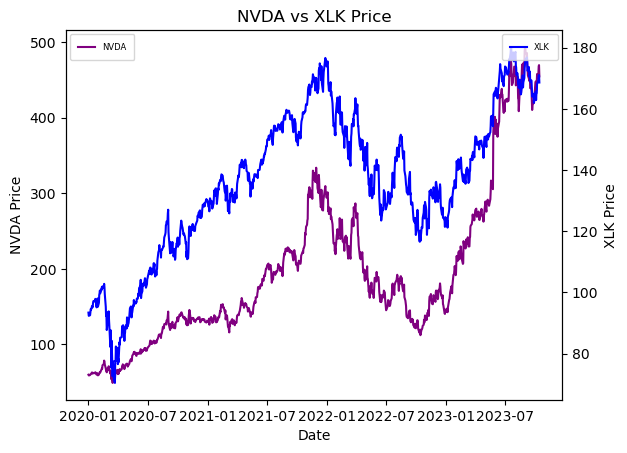

In [73]:
# Finding correlation between NVDA and XLK ETF
fig, ax = plt.subplots()
ax.plot(df['Close'], color='purple', label='NVDA')
ax.set_xlabel('Date')
ax.set_ylabel('NVDA Price')
ax.legend(loc='upper left', borderpad=1, fontsize=6)

ax2 = ax.twinx()
ax2.plot(df_xlk['Close'], color='blue', label='XLK')
ax2.set_ylabel('XLK Price')
ax2.legend(loc='upper right', borderpad=1, fontsize=6)
plt.title('NVDA vs XLK Price')

In [54]:
df1 = df
df1['pct_change'] = df1['Close'].pct_change()
df1['log_return'] = np.log(1 + df1['pct_change'])
df1.tail()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_return
Date,,,,,,,,
2023-10-09,448.420013,456.049988,443.679993,452.730011,452.730011,40967500,-0.010686,-0.010743
2023-10-10,453.100006,462.589996,450.880005,457.980011,457.980011,36858200,0.011596,0.011530
2023-10-11,461.959991,468.589996,460.500000,468.059998,468.059998,37813700,0.022010,0.021771
2023-10-12,467.769989,476.089996,463.299988,469.450012,469.450012,48132500,0.002970,0.002965
2023-10-13,469.600006,471.160004,452.799988,454.609985,454.609985,47411500,-0.031612,-0.032122


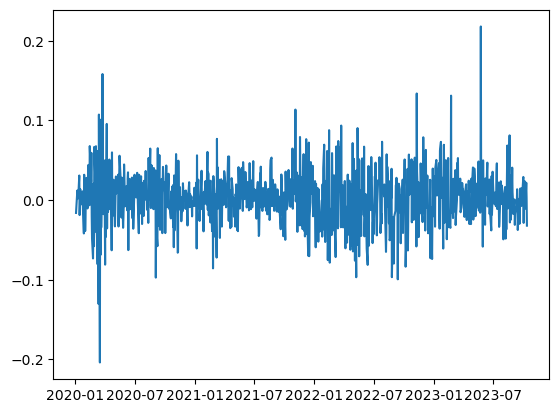

In [55]:
plt.plot(df1['log_return'])

## Prepare Data

In [88]:
# Calculate SMA20 for XLK
df['xlk_SMA20'] = df_xlk['Close'].rolling(20).mean()

# Calculate percentage changes
df['pct_change'] = df['Close'].pct_change()
df['log_return'] = np.log(1 + df['pct_change'])

# Remove NaN SMA20 values
df[19:]

,Open,High,Low,Close,Adj Close,Volume,xlk_SMA20,pct_change,log_return
Date,,,,,,,,,
2020-01-30,60.402500,61.587502,59.849998,61.452499,61.218685,29050400,95.485000,0.001100,0.001099
2020-01-31,60.992500,61.112499,58.687500,59.107498,58.882599,37042000,95.582000,-0.038160,-0.038907
2020-02-03,58.924999,60.277500,58.862499,60.082500,59.853893,25556400,95.794500,0.016495,0.016361
2020-02-04,61.507500,61.974998,61.005001,61.782501,61.547436,27154400,96.122500,0.028294,0.027902
2020-02-05,62.997501,63.099998,61.852501,62.689999,62.451477,20822000,96.481500,0.014689,0.014582
...,...,...,...,...,...,...,...,...,...
2023-10-09,448.420013,456.049988,443.679993,452.730011,452.730011,40967500,166.432500,-0.010686,-0.010743
2023-10-10,453.100006,462.589996,450.880005,457.980011,457.980011,36858200,166.373001,0.011596,0.011530
2023-10-11,461.959991,468.589996,460.500000,468.059998,468.059998,37813700,166.370501,0.022010,0.021771


In [ ]:
# Normalise data
scaler = MinMaxScaler(feature_range=(0, 1))


### Train Test Split (80, 20)

### Stacked LSTM Implementation
Stacked LSTM allows us to process time series data.